In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler  

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F

In [28]:
train = pd.read_csv("../input/tabular-playground-series-jun-2021/train.csv", index_col = 'id')
test = pd.read_csv("../input/tabular-playground-series-jun-2021/test.csv", index_col = 'id')

TARGET = 'target'
train = train[~train.drop('target', axis = 1).duplicated()]
train.shape

(199776, 76)

In [29]:
X = pd.DataFrame(train.drop("target", axis = 1))
y = pd.DataFrame(LabelEncoder().fit_transform(train['target']), columns=['target'])

<AxesSubplot:xlabel='target', ylabel='count'>

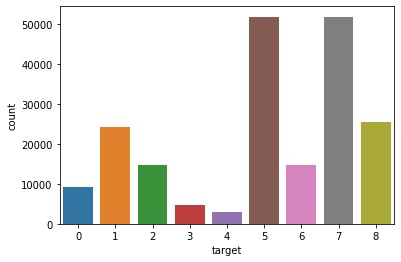

In [30]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, stratify=y, random_state= 2021)

sns.countplot(x = TARGET, data= y)

In [31]:
X_train, y_train = np.array(X_train, dtype= np.float32), y_train['target'].values 
X_valid, y_valid = np.array(X_valid, dtype= np.float32), y_valid['target'].values


In [32]:
class Data(Dataset):
    
    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data
        
    def __getitem__(self, index):
        return self.X_data[index], self.y_data[index]
        
    def __len__ (self):
        return len(self.X_data)

train_dataset = Data(torch.from_numpy(X_train).float(), torch.from_numpy(y_train).long())
valid_dataset = Data(torch.from_numpy(X_valid).float(), torch.from_numpy(y_valid).long())

In [33]:
train_loader = DataLoader(dataset=train_dataset,
                          batch_size=32)

In [34]:
class Model(nn.Module):
    def __init__(self):
        super(Model,self).__init__()
        self.network= nn.Sequential(
            nn.Linear(75,512),
            nn.Sigmoid(),
            nn.Linear(512,256),
            nn.ReLU(),
            nn.Linear(256,128),
            nn.Sigmoid(),
            nn.Linear(128,32),
            nn.ReLU(),
            nn.Linear(32,9))
    def forward(self,x):
        return self.network(x)
    
device = torch.device("cuda")
print(device)
 
model = Model()
model.to(device)
optimizer = optim.Adam(model.parameters(),lr = 0.0005)
loss_fn = nn.CrossEntropyLoss()

cuda


In [35]:
epoch = 5
for i in range(epoch):
    batch=0
    loss1=0
    for x,y in train_loader:
        batch+=1
        if torch.cuda.is_available():
            x,y = x.cuda(),y.cuda()
    
        optimizer.zero_grad()
        output = model(x)
        loss = loss_fn(output,y)
        loss.backward()
        optimizer.step()
        loss1 += loss.item()
    loss1/=batch
    print("avg loss in {i+1} epoch is {loss1}")

avg loss in 1 epoch is 1.8001039384721635
avg loss in 2 epoch is 1.773865607837299
avg loss in 3 epoch is 1.7650731703421256
avg loss in 4 epoch is 1.7580669975614882
avg loss in 5 epoch is 1.7512353098308957
